#glass.csv

### Importe de datos

In [ ]:
import numpy as np
import tensorflow as tf
import math
from matplotlib import pyplot as plt
from urllib import request
from sklearn.metrics import ConfusionMatrixDisplay
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",", skiprows=1)

###Ej 1

In [ ]:
dataset[:, 9] -= 1 # necesitamos que las clases vayan del 0 al 6

In [ ]:
y_train = dataset[:, 9:]
X_train = dataset[:, :9]

Para una activación softmax, suponemos que la cantidad de parámetros va a corresponder a la cantidad de clases a definir k (en este caso 7) y la dimensión del input (en este caso 9). De esta forma, vamos a tener que guardar 7 vectores W de dimensión 9, y 7 bias escalares, siendo en total 70 parámetros.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(7, input_dim=9, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 70        
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
hist = model.fit(x=X_train, y=y_train, batch_size = 256, epochs=3000,callbacks=[es])

Epoch 1/3000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 13ms/step - loss: 1.8199 - accuracy: 0.3084
Epoch 502/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.8197 - accuracy: 0.3084
Epoch 503/3000
1/1 [==============================] - 0s 14ms/step - loss: 1.8195 - accuracy: 0.3084
Epoch 504/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.8192 - accuracy: 0.3084
Epoch 505/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.8190 - accuracy: 0.3084
Epoch 506/3000
1/1 [==============================] - 0s 14ms/step - loss: 1.8188 - accuracy: 0.3084
Epoch 507/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.8186 - accuracy: 0.3084
Epoch 508/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.8183 - accuracy: 0.3084
Epoch 509/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.8181 - accuracy: 0.3084
Epoch 510/3000
1/1 [============================

In [ ]:
def clasificar_vidrio(x):
  return np.argmax(model.predict(x=x), axis = 1)

clasificar_vidrio(np.array([1.52, 13, 3.5, 1.2, 73, 0.6, 9, 0.1, 0.2]).reshape(1, 9))[0]

1/1 [==============================] - 0s 101ms/step


0

7/7 [==============================] - 0s 4ms/step


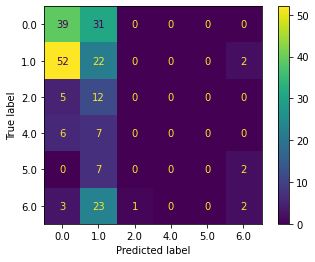

In [ ]:
y_pred = clasificar_vidrio(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

###PCA

#### Parte 1

In [ ]:
from sklearn import decomposition

X0 = X_train - np.mean(X_train, axis = 0)
n,dx=np.shape(X_train)
C=X0.T @ X0/n
ava, ave = np.linalg.eig(C)

In [ ]:
ECM = []
for dim in range(1, dx + 1):
  U = X0 @ ave[:,:dim]
  Xh = U @ ave[:,:dim].T
  ECM_iter = np.sum((X0-Xh)**2)/n
  ECM.append(ECM_iter)

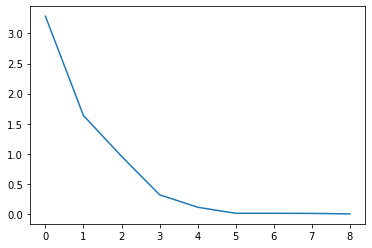

In [ ]:
plt.plot(ECM)
plt.show()

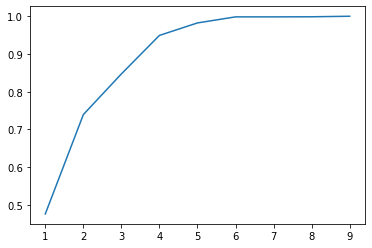

In [ ]:
porcentaje_energia = []
suma_total_ava = sum(ava)
for i in range(1, len(ava) + 1):
  porcentaje_energia.append(sum(ava[:i]) / suma_total_ava)

plt.plot(list(range(1, len(ava) + 1)), porcentaje_energia)
plt.show()

#### Parte 2

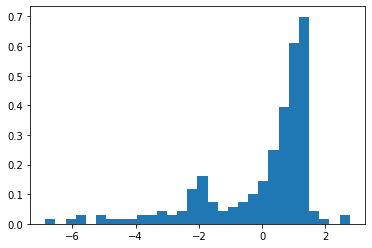

In [ ]:
U_una_comp = X0 @ ave[:, :1]
plt.hist(U_una_comp, bins = 30, density=True)
plt.show()

Distribución aproximada a una normal con media 1.



In [ ]:
from scipy.stats import norm

e_media, e_varianza = norm.fit(U_una_comp)

l = []
for i in range(5):
  l.append(np.random.randn() * np.square(e_varianza) + e_media)